# Transfer Learning

Today we will work through retraining the EfficientNetV2S model (pretrained with ImageNet data) to identify Niblet. To find out more about the EfficientNetV2 models, you can read the [original paper](https://arxiv.org/abs/2104.00298). There are several versions of this model (S,M,L) that have progressively more parameters. You can try swapping in the M or L version to see if that improves performance. 

Big idea of transfer learning:
> Use the core of a pre-trained model (trained on a different but similar task) and only train a new set of the final few layers. The parameters in the pre-trained model are frozen, so that they are not updated during the training. 

Resources for more about transfer learning:
* Youtube: [Efficient Image Classification with Transfer Learning and Image Augmentation with TensorFlow Keras](https://youtu.be/CLHk6DniYg0?si=QaASdY0grCUVddWm)
* [Youtube Video Demo Code](https://colab.research.google.com/drive/1-wsOk_fm72QF-bHAq_LKoJ99L4hveXqi?usp=sharing)
* Tensorflow Tutorial: [Transfer Learning with TensoFlow Hub](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub)

In [19]:
# Import necessary packages
import tensorflow as tf

## Import Pre-trained model and freeze layers

In [17]:
from tensorflow.keras.applications import EfficientNetV2S

V2S_model = EfficientNetV2S(weights='imagenet',
                        include_top=False,
                        input_shape=(224, 224, 3))

for layer in V2S_model.layers:
  layer.trainable = False

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [18]:
V2S_model.summary()

Model: "efficientnetv2-s"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_8 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 24)      │             648 │ rescaling_8[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 24)      │              96 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 24)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_conv (Conv2D) │ (None, 112, 112, 24)      │           5,184 │ stem_activation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_bn            │ (None, 112, 112, 24)      │              96 │ block1a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_activation    │ (None, 112, 112, 24)      │               0 │ block1a_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_add (Add)             │ (None, 112, 112, 24)      │               0 │ block1a_project_activatio… │
│                               │                           │                 │ stem_activation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_project_conv (Conv2D) │ (None, 112, 112, 24)      │           5,184 │ block1a_add[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_project_bn            │ (None, 112, 112, 24)      │              96 │ block1b_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_project_activation    │ (None, 112, 112, 24)      │               0 │ block1b_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_drop (Dropout)        │ (None, 112, 112, 24)      │               0 │ block1b_project_activatio… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_add (Add)             │ (None, 112, 112, 24)      │               0 │ block1b_drop[0][0],        │
│                               │                           │                 │ block1a_add[0][0]          │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 20,331,360 (77.56 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,331,360 (77.56 MB)

## Create our preprocessing and final layers

We will recreate our image augmentation layers that will feed into the model. We won't need the Rescaling layer, because the EfficientNet model includes that. Feel free to modify the augmentation.

We will also add some final layers to convert the "features" created by the EfficientNet model down to a single output node. 

In [23]:
from tensorflow.keras import layers

image_preprocess = tf.keras.Sequential([
    tf.keras.Input((None,None,3)),
    layers.Resizing(224,224, crop_to_aspect_ratio = True),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
], name = "image_aug")

transfer_model = tf.keras.Sequential([
    tf.keras.Input((None,None,3)),
    image_preprocess,
    V2S_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation = 'sigmoid')
])

transfer_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ image_aug (Sequential)               │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-s (Functional)        │ (None, 7, 7, 1280)          │      20,331,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,987,745 (80.06 MB)

 Trainable params: 656,385 (2.50 MB)

 Non-trainable params: 20,331,360 (77.56 MB)

In [27]:
metrics = [tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')]

transfer_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=metrics)

## Setup Data Pipeline

In [28]:
# You can mess with batch size
BATCH_SIZE = 16
IMAGE_SIZE = (224,224)
SEED = 1

# This sets up a training and validation set from our ../data/ directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    '../data/',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=SEED)

# This is the validation set. Notice `shuffle = FALSE` and `subset = validation`
val_dataset = tf.keras.utils.image_dataset_from_directory(
    '../data/',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=False,
    validation_split=0.2,
    subset='validation',
    seed=SEED)

Found 1469 files belonging to 2 classes.
Using 1176 files for training.
Found 1469 files belonging to 2 classes.
Using 293 files for validation.


## Train the Model

Time for some popcorn

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, monitor='val_loss')

history = transfer_model.fit(train_dataset, epochs=100,
                             validation_data=val_dataset,
                             callbacks=[es])

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 45s 606ms/step - accuracy: 0.9876 - loss: 0.0477 - val_accuracy: 0.9454 - val_loss: 0.1978
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 599ms/step - accuracy: 0.9917 - loss: 0.0245 - val_accuracy: 0.9693 - val_loss: 0.1401
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 45s 602ms/step - accuracy: 0.9859 - loss: 0.0360 - val_accuracy: 0.9590 - val_loss: 0.1339
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 46s 616ms/step - accuracy: 0.9927 - loss: 0.0252 - val_accuracy: 0.9659 - val_loss: 0.1268
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 47s 639ms/step - accuracy: 0.9901 - loss: 0.0263 - val_accuracy: 0.9659 - val_loss: 0.1247
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 48s 654ms/step - accuracy: 0.9866 - loss: 0.0369 - val_accuracy: 0.9659 - val_loss: 0.1324
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 50s 675ms/step - accuracy: 0.9922 - loss: 0.0290 - val_accuracy: 0.9761 - val_loss: 0.1180
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 49s 660ms/step - accuracy: 0.9951 - loss: 0.0178 - 

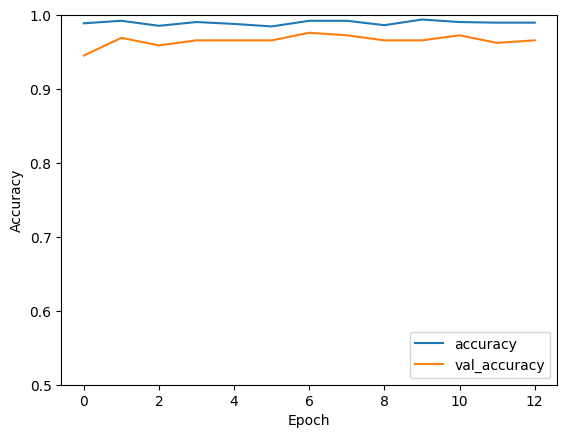

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Save the model

If you like your model, then save your model.

In [35]:
transfer_model.save('../models/transfer_model_gt_2024_04_20.keras')